In [60]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
from collections import Counter
from scipy.stats import bernoulli

# Statistic

In [6]:
# calculando média com numpy
np.mean([1,2,3,4,100])

22.0

In [7]:
#mediana
np.median([1,2,3,4,100])

3.0

In [8]:
# Qual a cor mais comum?
stats.mode(['verde','azul','verde','verde'])

ModeResult(mode=array(['verde'], dtype='<U5'), count=array([3]))

### Amplitude 

In [9]:
lista1 = [1,2,3,4,5]

In [10]:
# amplitude 
amplitude = np.max(lista1) - np.min(lista1)
amplitude

4

### Amostral Variance

In [11]:
lista2 = np.array([1,2,3,4,5])

In [12]:
# extraindo a média da amostra
media_lista2 = np.mean(lista2)

In [13]:
# extraindo os desvios ao quadrado da média
desvios_quadrado = (lista2 - media_lista2)**2

In [14]:
desvios_quadrado

array([4., 1., 0., 1., 4.])

In [15]:
# somando os devios e dividindo por n-1
np.sum(desvios_quadrado)/(len(desvios_quadrado) -1)

2.5

In [16]:
lista2.var()

2.0

### Quantis, Percentis e Quartis

In [17]:
lista3 = np.arange(100)

In [18]:
# Checando se o quantil 0.25 é igual ao percentil 25
np.quantile(lista3, 0.25) == np.percentile(lista3, 25)

True

## Análise Qualitativa

### Tabela de Constigência 

In [22]:
# Criando tabela de contingência
df_alunos_disciplinas1 = pd.DataFrame({'Sexo':np.random.choice(['Feminino', 'Masculino'], 100),
                                       'Disciplina': np.random.choice(['Matemática', 'Estatística'], 100)})

In [23]:
df_alunos_disciplinas1

,Sexo,Disciplina
0,Feminino,Matemática
1,Feminino,Estatística
2,Feminino,Matemática
3,Masculino,Estatística
4,Feminino,Matemática
...,...,...
95,Feminino,Estatística
96,Masculino,Estatística
97,Masculino,Estatística
98,Masculino,Estatística


In [24]:
# Criando tabela de contingência
pd.crosstab(df_alunos_disciplinas1['Sexo'], df_alunos_disciplinas1['Disciplina'])

Disciplina,Estatística,Matemática
Sexo,,
Feminino,26,28
Masculino,21,25


### Associação de variáveis 

In [25]:
df_alunos_disciplinas2 = pd.DataFrame({'Estatística':[60,15], 'Matemática':[110, 50]}, 
                                     index=['Masculino', 'Feminino'])

In [26]:
df_alunos_disciplinas2['Total'] = df_alunos_disciplinas2['Estatística']+df_alunos_disciplinas2['Matemática']

In [27]:
df_alunos_disciplinas2

,Estatística,Matemática,Total
Masculino,60,110,170
Feminino,15,50,65


In [28]:
df_alunos_disciplinas2.sum()/df_alunos_disciplinas2['Total'].sum()

Estatística    0.319149
Matemática     0.680851
Total          1.000000
dtype: float64

In [29]:
df_alunos_disciplinas2[['Estatística','Matemática']].apply(lambda x: 100*x/x.sum(), axis=1)

,Estatística,Matemática
Masculino,35.294118,64.705882
Feminino,23.076923,76.923077


### Chi2
$\huge\frac{\left( o-e \right)^{2}}{e}$

In [30]:
df_alunos_disciplinas2[['Estatística','Matemática']].apply(lambda x: 100*x/x.sum(), axis=1)

,Estatística,Matemática
Masculino,35.294118,64.705882
Feminino,23.076923,76.923077


In [31]:
df_alunos_disciplinas2

,Estatística,Matemática,Total
Masculino,60,110,170
Feminino,15,50,65


In [32]:
esperado_masculino_estatistica = int(0.32*170)
observado_masculino_estatistica = 60
esperado_masculino_matematica = 170 - int(0.32*170)
observado_masculino_matematica = 110

In [33]:
esperado_feminino_estatistica = int(0.32*65)
observado_feminino_estatistica = 15
esperado_feminino_matematica = 65 - int(0.32*65)
observado_feminino_matematica = 50

In [34]:
array_observados = np.array([observado_masculino_estatistica,
                             observado_masculino_matematica,
                             observado_feminino_estatistica, 
                             observado_feminino_matematica])

In [35]:
array_esperados = np.array([esperado_masculino_estatistica,
                             esperado_masculino_matematica,
                             esperado_feminino_estatistica, 
                             esperado_feminino_matematica])

In [37]:
((array_observados-array_esperados)**2)/array_esperados

array([0.66666667, 0.31034483, 1.25      , 0.55555556])

In [36]:
chi2 = sum((array_observados-array_esperados)**2/array_esperados)
chi2


2.7825670498084287

In [38]:
chi2_teste, p, df, arr = stats.chi2_contingency(df_alunos_disciplinas2.drop('Total',axis=1))

In [39]:
chi2_teste

2.6921434294871784

### Cramer V

\begin{equation*}
V = \sqrt{\frac{\chi^2}{n\times\left(\text{MIN}\left(r, c\right) - 1\right)}}
\end{equation*}

In [40]:
r = len(df_alunos_disciplinas2.drop('Total',axis=1))
c = len(df_alunos_disciplinas2.drop('Total',axis=1).columns)
n = df_alunos_disciplinas2.drop('Total',axis=1).to_numpy().sum()

r, c, n, chi2

(2, 2, 235, 2.7825670498084287)

In [42]:
V = np.sqrt((chi2/n*(np.min([r,c]) -1)))
V

0.10881503044271335

Para determinar o nível de força dessa associação, precisamos levar em consideração ainda o grau de liberdade. O grau de liberdade é simplesmente MIN(r,c) - 1. Segundo Cohen (1988, pp. 222,224, 225), devemos observar esse grau de liberdade antes de tirar conclusões sobre o valor de V.

In [44]:
gl = np.min([r,c]) -1
gl

1

A interpretação de V, seguindo a tabela proposta por Cohen, baseada em graus de liberdade, gl, é esta abaixo:

|gl|desprezível|baixo|médio|alto|
|-------|---|---|---|---|
|1|0 < .10|.10 < .30|.30 < .50|.50+|
|2|0 < .07|.07 < .21|.21 < .35|.35+|
|3|0 < .06|.06 < .17|.17 < .29|.29+|
|4|0 < .05|.05 < .15|.15 < .25|.25+|
|5|0 < .05|.05 < .13|.13 < .22|.22+|

### Associação Entre variáveis Quantitativas

### Pearson

In [46]:
df_anos_servicos_clientes = pd.read_csv('correlacao1.csv', sep = ";")
df_anos_servicos_clientes

,tempo_de_serviço,numero_de_clientes
0,1,200
1,1,205
2,1,200
3,1,220
4,1,230
5,"1,5",240
6,"1,6",300
7,"1,8",380
8,2,430
9,2,440


In [48]:
df_anos_servicos_clientes.describe()

,numero_de_clientes
count,41.000000
mean,683.463415
std,321.336747
min,200.000000
25%,430.000000
50%,680.000000
75%,1002.000000
max,1250.000000


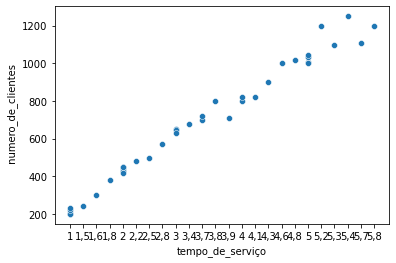

In [49]:
sns.scatterplot(data=df_anos_servicos_clientes, x='tempo_de_serviço', y=' numero_de_clientes')
plt.show()

In [50]:
df_renda_saude = pd.read_csv('correlacao3.csv', sep = ";")
df_renda_saude

,renda,gasto_saude
0,2000,500
1,2000,470
2,2200,470
3,2800,450
4,3000,456
5,5000,480
6,5400,479
7,6000,450
8,7000,430
9,7900,450


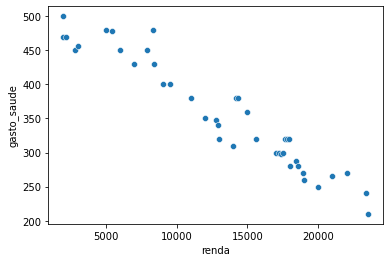

In [51]:
sns.scatterplot(data=df_renda_saude, x='renda', y='gasto_saude')
plt.show()

In [52]:
df_resultado_tempo = pd.read_csv('correlacao2.csv', sep = ';')

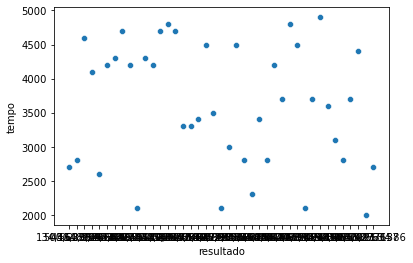

In [53]:
sns.scatterplot(data=df_resultado_tempo, x="resultado", y='tempo')
plt.show()


In [54]:
# criando nuvens de pontos
x = np.linspace(-1,1,100)
y1 = 2*x + np.random.normal(0, 1,len(x))
y2 = -2*x + np.random.normal(0, 1,len(x))
y3 = np.random.normal(0, 1,len(x))

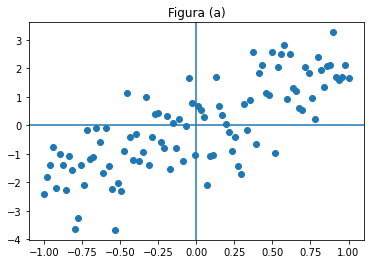

In [55]:
plt.scatter(x,y1)
plt.title('Figura (a)')
plt.axhline(0)
plt.axvline(0)
plt.show()

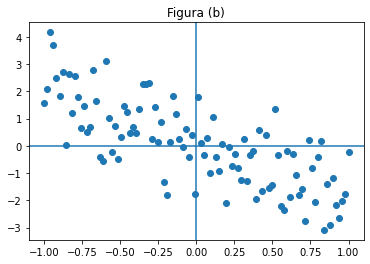

In [56]:
plt.scatter(x,y2)
plt.title('Figura (b)')
plt.axhline(0)
plt.axvline(0)
plt.show()

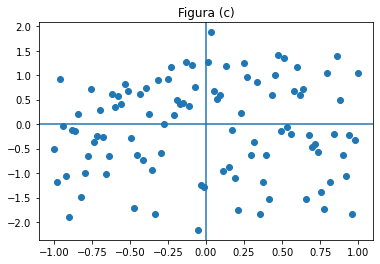

In [57]:
plt.scatter(x,y3)
plt.title('Figura (c)')
plt.axhline(0)
plt.axvline(0)
plt.show()

### Matriz de correlação

In [58]:
df_iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

<AxesSubplot:>

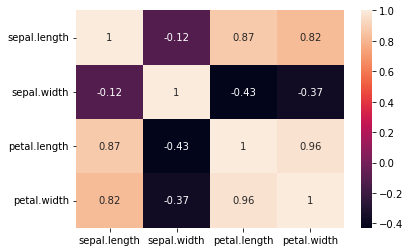

In [59]:
sns.heatmap(df_iris.corr(), annot=True)

### Correlação de Spearman

<img src="https://bloqm.files.wordpress.com/2013/10/rho-de-spearman.jpg" height=300 width=300>

<ol>
    <li> Extrair o ranking de valores para as variáveis</li>
    <li> Calcular a distância dos rankings </li>
    <li> Calcular a distância ao quadrado</li>
    <li> Aplicar a equação de Spearman </li>
</ol>

In [62]:
# Dados para teste
df_spearman = pd.DataFrame({'x':[73, 76, 78, 65, 86, 82, 91],
                            'y':[77, 78, 79, 80, 86, 89, 95]})
df_spearman

,x,y
0,73,77
1,76,78
2,78,79
3,65,80
4,86,86
5,82,89
6,91,95


1.

In [63]:
df_spearman['x_rank'] = df_spearman['x'].rank(ascending=False)
df_spearman['y_rank'] = df_spearman['y'].rank(ascending=False)

In [64]:
df_spearman

,x,y,x_rank,y_rank
0,73,77,6.0,7.0
1,76,78,5.0,6.0
2,78,79,4.0,5.0
3,65,80,7.0,4.0
4,86,86,2.0,3.0
5,82,89,3.0,2.0
6,91,95,1.0,1.0


2.

In [65]:
df_spearman['d'] = df_spearman['x_rank'] - df_spearman['y_rank']
df_spearman

,x,y,x_rank,y_rank,d
0,73,77,6.0,7.0,-1.0
1,76,78,5.0,6.0,-1.0
2,78,79,4.0,5.0,-1.0
3,65,80,7.0,4.0,3.0
4,86,86,2.0,3.0,-1.0
5,82,89,3.0,2.0,1.0
6,91,95,1.0,1.0,0.0


3.

In [66]:
df_spearman['d2'] = df_spearman['d']**2
df_spearman

,x,y,x_rank,y_rank,d,d2
0,73,77,6.0,7.0,-1.0,1.0
1,76,78,5.0,6.0,-1.0,1.0
2,78,79,4.0,5.0,-1.0,1.0
3,65,80,7.0,4.0,3.0,9.0
4,86,86,2.0,3.0,-1.0,1.0
5,82,89,3.0,2.0,1.0,1.0
6,91,95,1.0,1.0,0.0,0.0


4.

In [67]:
sum_d2 = df_spearman['d2'].sum()
n = len(df_spearman)
rs = 1 - (6*sum_d2)/(n*(n**2 -1))

In [68]:
rs

0.75

In [69]:
df_spearman[['x','y']].corr(method='spearman')

,x,y
x,1.00,0.75
y,0.75,1.00


### <i> OBS: A correlação de Pearson não consegue captar uma relação não-linear tão bem quanto a de Spearman. <i>

### Correlação Point-Biserial

A correlaçao Point-Biserial é um caso particular da correlação de Pearson. É usada para casos em que têm-se uma variável dicotômica (2 valores possíveis) e uma variável contínua.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/790e9e1b2fd9213233a747036ff6b87efe4efb5e)

```M1```: Média da variável contínua para o grupo 1<br>
```M0```: Média da variável contínua para o grupo 0<br>
```n1```: Número de observações do grupo 1<br>
```n0```: Número de observações do grupo 0<br>
```n```:  Número total de observações<br>
```Sn```: Desvio Padrão Populacional<br>

In [70]:
np.random.seed(10)
x1 = np.random.normal(10, 10, 100)
x2 = np.random.normal(60, 10, 100)
y = 100*[0] + 100*[1]

In [71]:
df_pb = pd.DataFrame({'x':np.concatenate([x1,x2]), 'y':y})

In [72]:
df_pb

,x,y
0,23.315865,0
1,17.152790,0
2,-5.454003,0
3,9.916162,0
4,16.213360,0
...,...,...
195,72.551737,1
196,69.471261,1
197,49.776893,1
198,71.671684,1


In [73]:
M0 = df_pb.groupby('y').mean().iloc[0,0]
M1 = df_pb.groupby('y').mean().iloc[1,0]
std_ = df_pb['x'].std(ddof=0)

ddof=0 will allow us to calculate the variance of a population. Meanwhile, ddof=1 will allow us to estimate the population variance using a sample of data.

In [74]:
df_pb.groupby('y').mean()

,x
y,
0,10.794167
1,60.691972


In [75]:
((M1-M0)/std_)*np.sqrt(0.5**2)

0.931246752810707

In [76]:
df_pb.corr()

,x,y
x,1.000000,0.931247
y,0.931247,1.000000


### R2

In [78]:
# Variável salário para cada cargo de engenharia
estg = np.random.choice(np.arange(1000, 2000), 100)
eng_jr = np.random.choice(np.arange(4500, 7000), 100)
eng = np.random.choice(np.arange(6500, 8000), 100)
eng_sr = np.random.choice(np.arange(7500, 11000), 100)
salarios = np.concatenate([estg, eng_jr, eng, eng_sr])

In [79]:
cargo = 100*['estg'] + 100*['eng_jr'] + 100*['eng'] + 100*['eng_sr']

In [80]:
df_salario = pd.DataFrame({'Cargo':cargo, 'Salário':salarios})
df_salario

,Cargo,Salário
0,estg,1265
1,estg,1283
2,estg,1308
3,estg,1346
4,estg,1825
...,...,...
395,eng_sr,9521
396,eng_sr,9155
397,eng_sr,9444
398,eng_sr,7515


In [81]:
# variância vai ser o desvio-padrão ao quadrado
var_total = (df_salario['Salário'].std())**2

In [83]:
var_total

9028016.004204256

In [84]:
var_estg = (estg.std())**2
var_eng_jr = (eng_jr.std())**2
var_eng = (eng.std())**2
var_eng_sr = (eng_sr.std())**2

In [85]:
var_combinada = (100*var_estg + 100*var_eng_jr + 100*var_eng + 100*var_eng_sr)/400

In [86]:
var_combinada

437215.165625

In [87]:
(var_total-var_combinada)/var_total

0.9515712903675189

In [88]:
var_total > var_combinada

True

## Tipos de Distribuição 

### Bernoulli

In [89]:
bernoulli_dist = bernoulli.rvs(p=0.7, # probabilidade de sucesso
                               size=100000, # numero de experimentos
                               loc=0, # fracasso
                               random_state=12) # seed

In [90]:
bernoulli_dist

array([1, 0, 1, ..., 1, 0, 1])

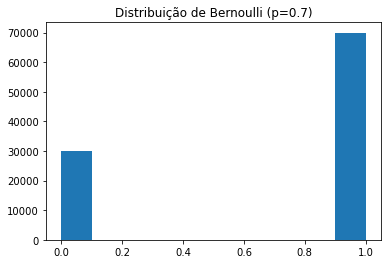

In [91]:
plt.hist(bernoulli_dist)
plt.title('Distribuição de Bernoulli (p=0.7)')
plt.show()

In [92]:
# média
bernoulli_dist.mean()

0.69962

In [93]:
# variância
bernoulli_dist.std()**2

0.21015185560000002

### Distribuição Binominal 

In [94]:
# numero de trials 
n_trials = 10000
# probabilidade de sucesso
p = 0.5
# numero de lançamentos em um trial
n_lancamentos = 5

In [95]:
resultados_trial = []
for i in range(n_trials):
    bernoulli_dist = bernoulli.rvs(p=p, # probabilidade de sucesso
                               size=n_lancamentos, # numero de experimentos
                               loc=0) # fracasso
    resultados_trial.append(sum(bernoulli_dist))

c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

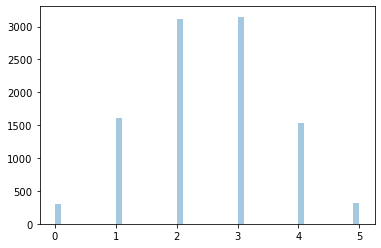

In [96]:
sns.distplot(resultados_trial,kde=False)

In [97]:
Counter(resultados_trial).items()

dict_items([(3, 3150), (4, 1527), (5, 315), (2, 3110), (1, 1603), (0, 295)])

In [98]:
df_trials = pd.DataFrame(Counter(resultados_trial).items(), columns=['Heads', 'Contagem'])

In [99]:
df_trials['Frequência'] = df_trials['Contagem']/10000

In [100]:
df_trials

,Heads,Contagem,Frequência
0,3,3150,0.3150
1,4,1527,0.1527
2,5,315,0.0315
3,2,3110,0.3110
4,1,1603,0.1603
5,0,295,0.0295


Também temos a forma "analítica" de construir uma curva de probabilidade para esse tipo de ensaio, utilizando a equação abaixo.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/9757f2616b6e9dffea51a6d9bcf9f958988063c3)

Onde:<br>
```n```: Número de ensaios<br>
```p```: Probabilidade de Sucesso<br>
```k```: Número de sucessos<br>

### Ex:

Imagine que você trabalha como cientista numna empresa de Call Center e você encontra as seguintes informações sobre a operação:
* A probabilidade de conversão de um cliente a cada ligação é 4% <br>
* Cada funcionário faz em média 50 ligações por dia <br>
* A receita média que cada cliente traz é RS 100.00 <br>
* A empresa tem 100 funcionários ligando para clientes<br>
* Cada funcionário recebe um salário de RS 200.00 por dia de trabalho<br>

In [101]:
# Simulação do call center

# numero de funcionarios
funcionarios = 100
# Salario dos funcionarios
salario = 200
# numero de ligações
n_ligacoes = 50
# probabilidade de sucesso da ligação 
p = 0.04
#receita trazida por um sucesso
receita = 100

In [102]:
# vamos criar uma binomial com esses parâmetros
np.random.seed(200)
sucessos_ligacoes = np.random.binomial(n_ligacoes, p, size=funcionarios)
# Algumas métricas do nosso call center
print('Conversão Média : ' + str(round(np.mean(sucessos_ligacoes), 2)))
print('Receita Total (1 dia): ' + str(np.sum(sucessos_ligacoes)*receita))
print('Despesa com Funcionários (1 dia): ' + str(funcionarios*salario))
print('Lucro de 1 dia: ' + str(np.sum(sucessos_ligacoes)*receita - funcionarios*salario))

Conversão Média : 2.25
Receita Total (1 dia): 22500
Despesa com Funcionários (1 dia): 20000
Lucro de 1 dia: 2500


In [103]:
# vamos simular 365 dias
lucro = []
for i in range(365):
    sucessos_ligacoes = np.random.binomial(n_ligacoes, p, size=funcionarios)
    lucro.append(np.sum(sucessos_ligacoes)*receita - funcionarios*salario)

c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


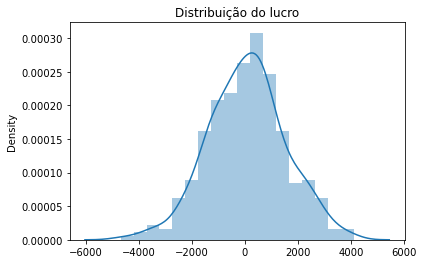

In [104]:
sns.distplot(lucro)
plt.title('Distribuição do lucro')
plt.show()

In [105]:
# vamos simular 365 dias
n1 = 55
p1 = 0.05
lucro1 = []
for i in range(365):
    sucessos_ligacoes1 = np.random.binomial(n1, p1, size=funcionarios)
    lucro1.append(np.sum(sucessos_ligacoes1)*receita - funcionarios*salario)

c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


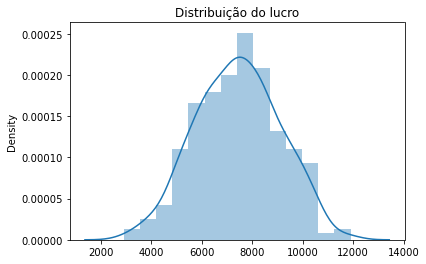

In [106]:
sns.distplot(lucro1)
plt.title('Distribuição do lucro')
plt.show()

c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


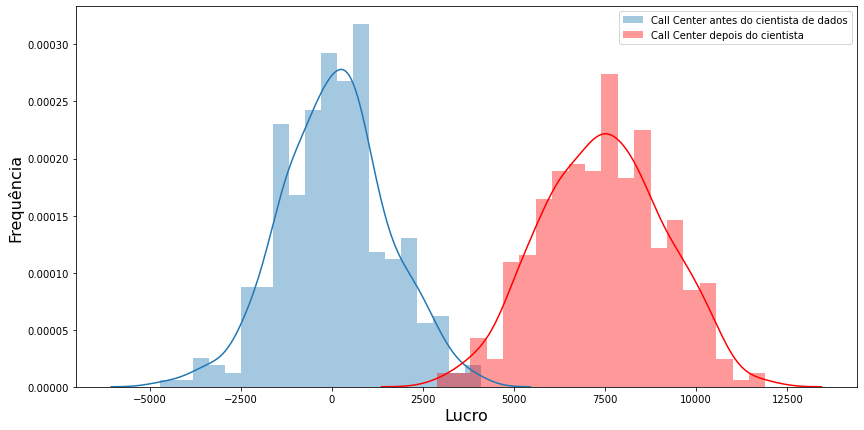

In [107]:
# Plot and save the results as a histogram
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(lucro, bins=20, label='Call Center antes do cientista de dados')
ax = sns.distplot(lucro1, bins=20, label='Call Center depois do cientista', color='red')
ax.set_xlabel("Lucro",fontsize=16)
ax.set_ylabel("Frequência",fontsize=16)
plt.legend()
plt.show()

### Distribuições Continuas

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/362834b765239b64cf7719a3a3a04e172c883e3d)

![](https://jingwen-z.github.io/images/20190319-boxplot-vs-pdf.png)

Diferentemente da Função de Massa de Probabilidade, essa Função não retorna a probabilidade, mas um valor correspondente ao que se conhece por densidade. Para calcular a probabilidade temos que encontrar a área dentro do intervalo especificado.

![](https://statistics.laerd.com/statistical-guides/img/normal-7.png)

Características interessantes:
- A curva é simétrica em relação a média
- A média, a moda e a mediana são iguais

### Distribuição Normal Padrão

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRKw5o96x3h5uI4_-LC9l-MANxreLjcFB_QdQ&usqp=CAU)

In [108]:
normal_dist = np.random.normal(50, 5, 3000)

c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


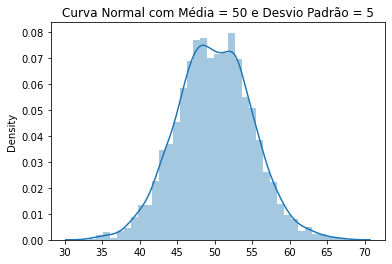

In [109]:
sns.distplot(normal_dist)
plt.title('Curva Normal com Média = 50 e Desvio Padrão = 5')
plt.show()

In [110]:
# media 
media_normal = normal_dist.mean()
# desvio 
desvio_normal = normal_dist.std()
# padronização
z_normal_dist = (normal_dist - media_normal)/desvio_normal

c:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


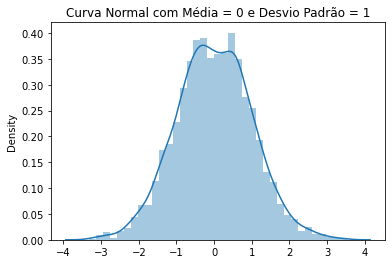

In [111]:
sns.distplot(z_normal_dist)
plt.title('Curva Normal com Média = 0 e Desvio Padrão = 1')
plt.show()

In [112]:
z_45 = (45-media_normal)/desvio_normal

In [113]:
stats.norm.cdf(z_45)

0.16235535087010838

## Inferência

### Lei dos Grandes Números

In [114]:
# probabilidade de sucesso
p = 0.5
# numero de lançamentos em um trial
max_lancamentos = 10000
resultado_experimento = []
for i in range(1,max_lancamentos+1):
    bernoulli_dist = bernoulli.rvs(p=p, # probabilidade de sucesso
                               size=i, # numero de experimentos
                               loc=0) # fracasso
    resultado_experimento.append(bernoulli_dist.mean())

In [115]:
n_lancamentos = np.arange(1,max_lancamentos+1)

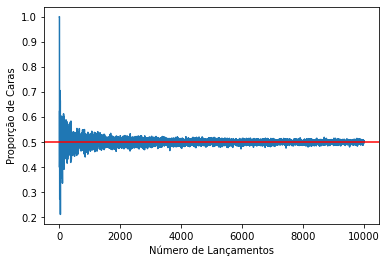

In [116]:
plt.plot(n_lancamentos, resultado_experimento)
plt.xlabel('Número de Lançamentos')
plt.ylabel('Proporção de Caras')
plt.axhline(0.5, color='red')
plt.show()

### Teorema do Limite Central 

In [119]:
mu = 3
sigma = 2
dist = np.random.lognormal(mu, sigma, 50000)

In [120]:
# media da distribuição
dist.mean()

148.55166527828897

In [121]:
sizes = [10, 20, 30, 40, 1000, 30000]
distributions_means = []
for s in sizes:
    d = []
    for n in np.arange(1000):
        d.append((np.random.choice(dist, s)).mean())
    distributions_means.append(d)

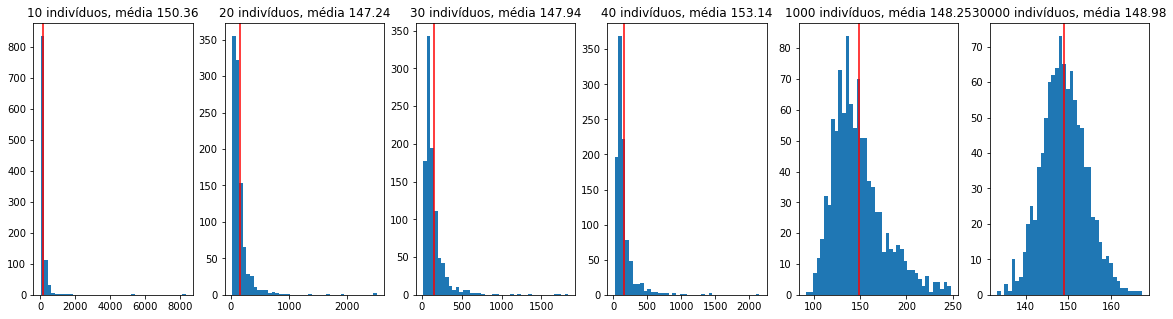

In [122]:
fig, ax = plt.subplots(1,6, figsize=(20,5))
for l in np.arange(6):
    m = round(np.mean(distributions_means[l]),2)
    ax[l].hist(distributions_means[l], bins=40)
    ax[l].axvline(m, color='red')
    ax[l].set_title(f'{sizes[l]} indivíduos, média {m}')

![](https://cdn1.byjus.com/wp-content/uploads/2019/08/central-limit-theorem-formula.jpeg)

A média da distribuição amostral é igual a média populacional e o desvio padrão amostral é igual ao desvio padrão populacional dividido pela raiz do número de elementos na amostra.

In [123]:
# média da população
dist.mean()

148.55166527828897

In [124]:
# desvio padrao da população
dist.std()

892.4449730128946

In [125]:
# Média da distribuição amostral
np.mean(distributions_means[5])

148.978702172361

In [126]:
# Desvio padrão populacional calculado a partir do amostral
np.std(distributions_means[5])*np.sqrt(30000)

896.2876473540279

In [127]:
np.mean(distributions_means[5])

148.978702172361

### Intervalo de Confiança

Em uma companhia aérea temos um vôo com 368 assentos, com um número de passagens vendidas de n=400. Sendo que a probabilidade de no-show é de 10%, e o custo de um passageiro excedente é de 1.000,00 Reais, com $ 0.95 $ de confiança, qual é a exposição financeira total da empresa aérea?

In [128]:
# identificando os dados
n=400 # número de passagens vendidas
p=0.1 # probabilidade de no show
risco_p_passageiro = 1000
assentos=368 # No. de assentos do avião

In [130]:
# Calculando a média:
media_show = (1-p)*n
print('média =', media_show)

# Cálculo do desvio-padrão 
std_amostral = (n*p*(1-p))**0.5
print('desvio-padrão =', std_amostral)

média = 360.0
desvio-padrão = 6.0


In [131]:
# calculando e imprimindo o intervalo de confiança
int_inferior = media_show - 1.96*std_amostral
int_superior = media_show + 1.96*std_amostral
print('Intervalo de confiança:', int_inferior, '<-->', int_superior)

Intervalo de confiança: 348.24 <--> 371.76


In [132]:
# calculando e imprimindo o risco financeiro
risco = ( int_superior - assentos ) * risco_p_passageiro
print ('Risco financeiro total =',risco)

Risco financeiro total = 3759.999999999991
